<a href="https://colab.research.google.com/github/sollall/myidea/blob/master/collision_circle_and_triangle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#https://2dengine.com/?p=intersections

In [3]:
def dot(ax, ay, bx, by):
  return ax*bx + ay*by

In [5]:
def pointOnTriangle(px, py, ax, ay, bx, by, cx, cy):
  abx, aby = bx - ax, by - ay
  acx, acy = cx - ax, cy - ay
  apx, apy = px - ax, py - ay
  
  d1 = dot(abx, aby, apx, apy)
  d2 = dot(acx, acy, apx, apy)
  if d1 <= 0 and d2 <= 0:
    return ax, ay
  
  #vertex region outside b
  bpx, bpy = px - bx, py - by
  d3 = dot(abx, aby, bpx, bpy)
  d4 = dot(acx, acy, bpx, bpy)
  if d3 >= 0 and d4 <= d3:
    return bx, by
  
  #edge region ab
  if d1 >= 0 and d3 <= 0 and d1*d4 - d3*d2 <= 0:
    v = d1/(d1 - d3)
    return ax + abx*v, ay + aby*v
  
  #vertex region outside c
  cpx, cpy = px - cx, py - cy
  d5 = dot(abx, aby, cpx, cpy)
  d6 = dot(acx, acy, cpx, cpy)
  if d6 >= 0 and d5 <= d6:
    return cx, cy
  
  if d2 >= 0 and d6 <= 0 and d5*d2 - d1*d6 <= 0:
    w = d2/(d2 - d6)
    return ax + acx*w, ay + acy*w

  #edge region bc
  if d3*d6 - d5*d4 <= 0:
    d43 = d4 - d3
    d56 = d5 - d6
    if d43 >= 0 and d56 >= 0:
      w = d43/(d43 + d56)
      return bx + (cx - bx)*w, by + (cy - by)*w
    
  #inside face region
  return px, py


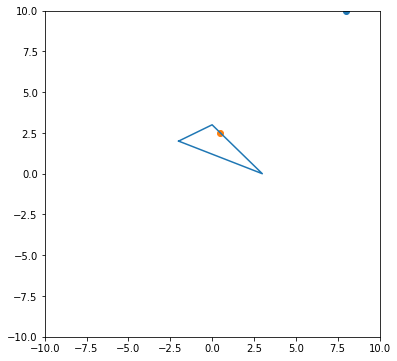

In [116]:
import matplotlib.pyplot as plt

px, py=8,10

x=[-2,3,0]
y=[2,0,3]

plt.figure(figsize=(6, 6))
plt.scatter(px,py)
plt.plot(x+[x[0]],y+[y[0]])
plt.xlim(-10,10)
plt.ylim(-10,10)

x,y=pointOnTriangle(px, py, x[0], y[0], x[1], y[1], x[2], y[2])
plt.scatter(x,y)

In [118]:
def pointInCircle(px, py, cx, cy, r):
  dx, dy = px - cx, py - cy
  return dx*dx + dy*dy <= r*r


In [121]:
def triangleVsCircle(ax, ay, bx, by, cx, cy, sx, sy, r):
  qx, qy = pointOnTriangle(sx, sy, ax, ay, bx, by, cx, cy)
  return pointInCircle(qx, qy, sx, sy, r)



False

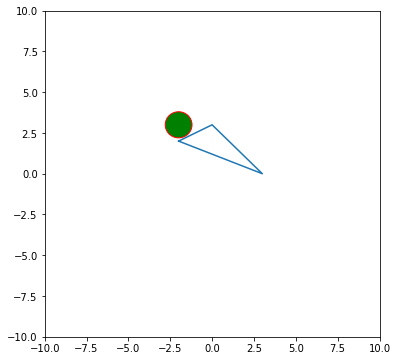

In [138]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

px, py,r=-2,3,.8

x=[-2,3,0]
y=[2,0,3]

fig = plt.figure(figsize=(6, 6))
ax = plt.axes()
c = patches.Circle(xy=(px, py), radius=r, fc='g', ec='r')
ax.add_patch(c)

ax.scatter(px,py)
ax.plot(x+[x[0]],y+[y[0]])
plt.xlim(-10,10)
plt.ylim(-10,10)


triangleVsCircle(x[0], y[0], x[1], y[1], x[2], y[2], px, py, r)
#plt.scatter(x,y)